# Classification Assignment


## **Task has been mentioned at the end of this notebook**  

## 1. Basic Pandas Operations

In [1]:
# # Import all the required Libraries

# import pandas as pd
# import numpy as np

# import seaborn as sns
# import matplotlib.pyplot as plt

In [2]:
# # Read the dataset and display the head. You will get the output as mentioned below

# # ______________________________
# # ______________________________
# df = pd.read_csv('train.csv')
# df.head()

In [3]:
# Check the shape of the dataframe

# ______________________________
# ______________________________


In [4]:
# On the dataframe apply info() function and observe the Dtypes and Missing Values

# ______________________________
# ______________________________


## 2. Cleaning the Data

In [5]:
# Impute the Null values in Health Indicator, Holding_Policy_Duration and Holding_Policy_Type

# ____________________________

# ____________________________

In [6]:
# Check again Holding_Policy_Duration is in object column convert that into int

# ____________________________

In [7]:
# Observe that ['Accomodation_Type','Reco_Insurance_Type','Is_Spouse'] 
# above these Object columns have two values - Yes and No


# ____________________________
# ____________________________

In [8]:
# Converting all the Yes to 1 and No to 0. 



# Write a for loop to iterate over the list given above
# For each feature use pandas 'apply()' to convert all the 'Yes' to 1 and 'No' to 0


# ______________________________
# ______________________________
    


In [9]:
# Now again having a look at all those columns to see if everything went well

# _________________________________

In [10]:
# Observe that all those columns are now converted from Object to Int64

# ________________________________

In [11]:
# Checking all the Object Dtypes - Here, these columns have more than 2 categories

# ______________________________
# ______________________________

In [12]:
# You can also do this to separate Object columns

# ____________________________

In [13]:
# Lets just try to see what is happening Response. Check the output.



In [14]:
# Dropping unknown column

# Write the code here to drop unknown column and check dataframe shape
# ______________________________
# ______________________________




In [15]:
# Getting all the Object Dtypes



In [16]:
# Encoding the categorical features



# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

# Write the code here to use 'encoder' to convert all the categorical columns to numerical representations
# Take extra care to convert encoded numpy array to dataframe and call that data fram 'df_encoded'

# ______________________________
# ______________________________




In [17]:
# Concatinating the original data frame and onehot encoded dataframe



In [18]:
# Drop all the unwanted columns.


# Because we have already encoded them and added to main dataframe



## Observe that 24.59% datapoints belong to one class rest all belongs to other class. Clearly dataset is having high imbalance.

**To Do:**
1. Read about Oversampling and Undersampling.
2. Perform undersampling.

## Train Test Split

**To Do:**
1. Sandardise the data
2. Perform 80-20 split

## Model Building - Logistic Regression

**To Do:**
1. Perform appropriate Hyperparameter Tuning
2. Train the Model using `Accuracy` as the evaluation metric
3. Predict
4. Evaluate
5. Use Accuracy, Confusion Matrix, Precision & Recall, F1-score and ROC AUC to understand model performance

--------------------------------------------------------------
--------------------------------------------------------------

## `Model Building - SVM, KNN, DT, RF, Gradient Boosting, AdaBoosting etc`

For all the algorithms mentioned above, perform below mentioned steps.

**To Do:**
1. Perform appropriate Hyperparameter Tuning
2. Train the Model using `Accuracy` as the evaluation metric
3. Predict
4. Evaluate
5. Use Accuracy, Confusion Matrix, Precision & Recall, F1-score and ROC AUC to understand model performance
6. Compare the perormance of all the models

In [19]:
# Import all the required Libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [20]:
X = pd.read_csv('X_final.csv')
y = pd.read_csv('y_final.csv')
X.head()

,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,0.453041,1,1,0.388109,0.500390,0,0.915891,0.402364,-2.260962,0.338243,0,0,1,0,0,0,0,0,0
1,-0.546579,0,1,-1.258835,-1.130593,0,0.915891,0.402364,1.071720,-1.709007,0,0,0,0,0,1,0,0,0
2,0.412972,1,0,0.388109,0.383891,1,-0.319605,0.402364,-0.594621,1.506538,0,1,0,0,0,0,0,0,0
3,-1.070993,0,1,-1.082377,-0.955844,0,0.915891,0.402364,-2.427596,-0.641224,1,0,0,0,0,0,0,0,0
4,0.072735,1,0,-0.905918,-0.839346,1,-1.025602,-0.774411,-2.427596,0.567530,1,0,0,0,0,0,0,0,0


<AxesSubplot:>

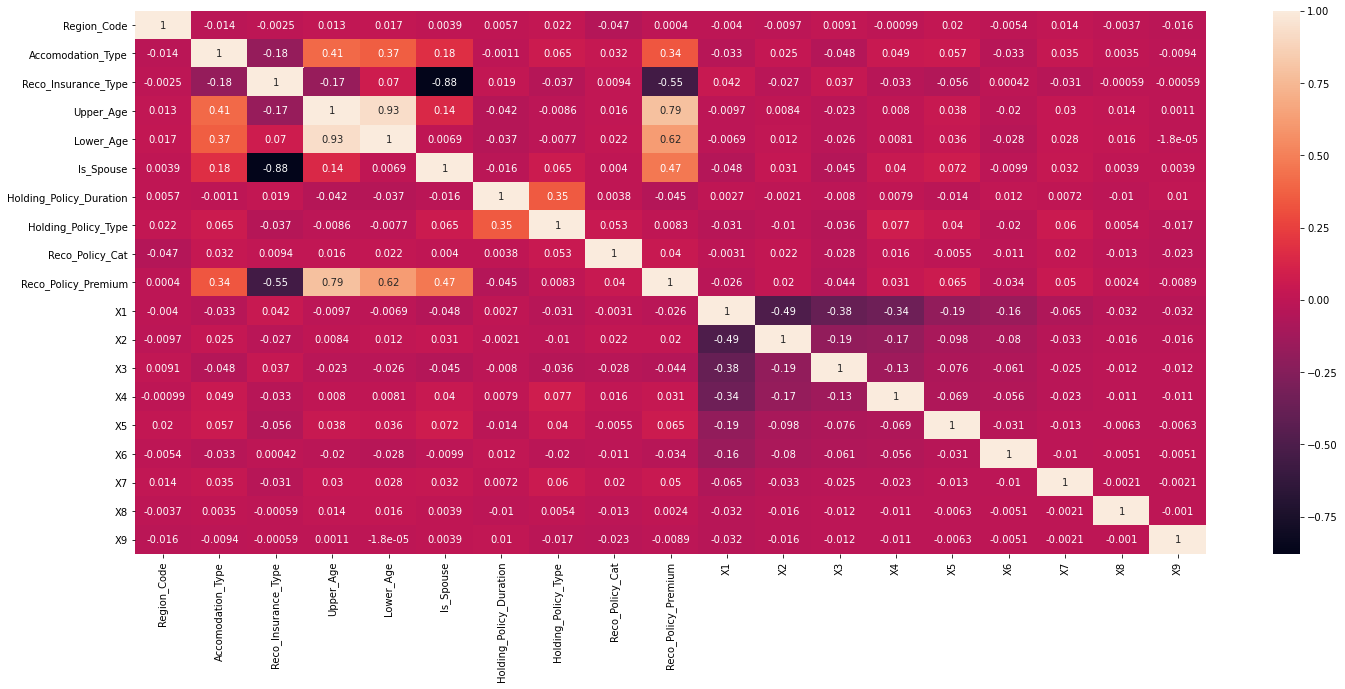

In [21]:
plt.figure(figsize=(24,10))
sns.heatmap(X.corr(),annot=True)

In [22]:
y.head()

,Response
0,0
1,0
2,0
3,0
4,0


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

-------------------------------------------------
-----------------------------------------------

## `Hyperparameter Tuning ---------------------------------------`

-------------------------------------------------------
------------------------------------------------------

### `Logistic Regression`

In [24]:
parameters = {
   'penalty':['l1', 'l2', 'elasticnet', 'none'],
    'C':[0.1,.01],
    'fit_intercept':[True,False],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter':[10,100],
    'multi_class':['auto', 'ovr', 'multinomial']
}

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression()
lr_grid = GridSearchCV(lr,parameters,n_jobs=-1,scoring="accuracy",cv=10)
lr_grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 0.01], 'fit_intercept': [True, False],
                         'max_iter': [10, 100],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [26]:
lr_grid.best_params_

{'C': 0.01,
 'fit_intercept': True,
 'max_iter': 10,
 'multi_class': 'auto',
 'penalty': 'l1',
 'solver': 'saga'}

In [27]:
lr = LogisticRegression(C = 0.01,
 fit_intercept = True,
 max_iter = 10,
 multi_class = 'multinomial',
 penalty =  'l1',
 solver =  'saga')

In [28]:
lr.fit(X_train,y_train)

LogisticRegression(C=0.01, max_iter=10, multi_class='multinomial', penalty='l1',
                   solver='saga')

In [29]:
y_pred = lr.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,recall_score
print('Accuracy =>',accuracy_score(y_test,y_pred))
print('Precision =>',precision_score(y_test,y_pred))
print('F-1 score =>',f1_score(y_test,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_test,y_pred))
print('Recall score',recall_score(y_test,y_pred))

Accuracy => 0.5087538619979403
Precision => 0.48878923766816146
F-1 score => 0.5782493368700266
Confusion matrix =>
 [[167 342]
 [135 327]]
Recall score 0.7077922077922078


In [31]:
y_pred_proba_logistic = lr.predict_proba(X_test)
y_pred_proba_logistic

array([[0.44450237, 0.55549763],
       [0.62561759, 0.37438241],
       [0.4354307 , 0.5645693 ],
       ...,
       [0.58160582, 0.41839418],
       [0.4354307 , 0.5645693 ],
       [0.4354307 , 0.5645693 ]])

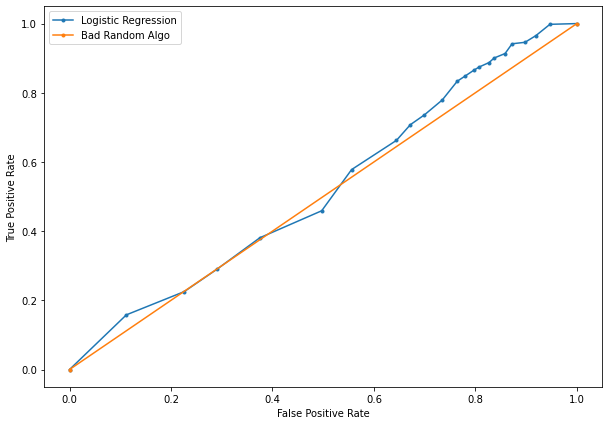

Logistic Regression AUC is => 0.5215982445844922


In [32]:
from sklearn.metrics import roc_curve,roc_auc_score

plt.figure(figsize=(10,7))

ns_prob = [0 for _ in range(len(y_test))]  # bad algo
ns_fpr,ns_tpr,thresholds = roc_curve(y_test,ns_prob)

lr_prob = y_pred_proba_logistic[:,1]
lr_auc = roc_auc_score(y_test,lr_prob)   # logistic regression
lr_fpr,lr_tpr,thesholds = roc_curve(y_test,lr_prob)
plt.plot(lr_fpr,lr_tpr,marker='.',label='Logistic Regression')
plt.plot(ns_fpr,ns_tpr,marker='.',label='Bad Random Algo')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print(f'Logistic Regression AUC is => {lr_auc}')

## `SVC`

In [33]:
parameters = {
    'kernel':['linear', 'poly', 'rbf'],
    'gamma':['scale', 'auto'] 
    
}

In [34]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC()
svc_grid = GridSearchCV(svc,parameters,n_jobs=-1,scoring="accuracy",cv=10)
svc_grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [35]:
svc_grid.best_params_

{'gamma': 'auto', 'kernel': 'poly'}

In [36]:
from sklearn.svm import SVC
svc = SVC(gamma='auto',kernel='rbf',probability=True)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

In [37]:
print('Accuracy =>',accuracy_score(y_test,y_pred))
print('Precision =>',precision_score(y_test,y_pred))
print('F-1 score =>',f1_score(y_test,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_test,y_pred))
print('Recall score',recall_score(y_test,y_pred))

Accuracy => 0.518022657054583
Precision => 0.4958217270194986
F-1 score => 0.6033898305084746
Confusion matrix =>
 [[147 362]
 [106 356]]
Recall score 0.7705627705627706


In [38]:
y_pred_proba_svc = svc.predict_proba(X_test)
y_pred_proba_svc

array([[0.48662739, 0.51337261],
       [0.72327094, 0.27672906],
       [0.44335621, 0.55664379],
       ...,
       [0.59463054, 0.40536946],
       [0.45685294, 0.54314706],
       [0.468432  , 0.531568  ]])

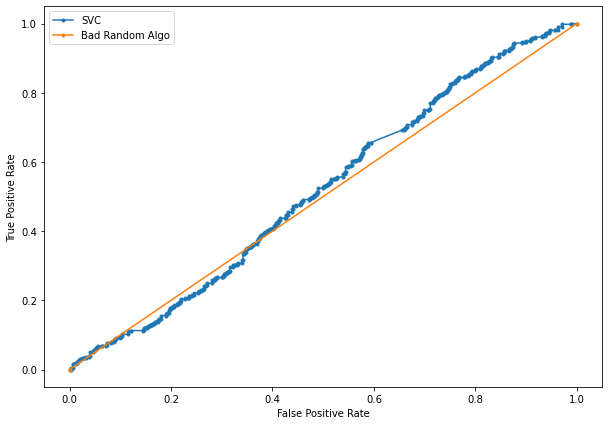

SVC AUC is => 0.5199355327056703


In [39]:
from sklearn.metrics import roc_curve,roc_auc_score

plt.figure(figsize=(10,7))

ns_prob = [0 for _ in range(len(y_test))]  # bad algo
ns_fpr,ns_tpr,thresholds = roc_curve(y_test,ns_prob)

svc_prob = y_pred_proba_svc[:,1]
svc_auc = roc_auc_score(y_test,svc_prob)   # logistic regression
svc_fpr,svc_tpr,thesholds = roc_curve(y_test,svc_prob)
plt.plot(svc_fpr,svc_tpr,marker='.',label='SVC')
plt.plot(ns_fpr,ns_tpr,marker='.',label='Bad Random Algo')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print(f'SVC AUC is => {svc_auc}')

## `KNN`

In [40]:
parameters = {
   'weights':['uniform', 'distance'],
   'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'] 
}

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn,parameters,n_jobs=-1,scoring="accuracy",cv=10)
knn_grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [42]:
knn_grid.best_params_

{'algorithm': 'auto', 'weights': 'distance'}

In [43]:
knn = KNeighborsClassifier(algorithm='auto',weights='distance')
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [44]:
print('Accuracy =>',accuracy_score(y_test,y_pred))
print('Precision =>',precision_score(y_test,y_pred))
print('F-1 score =>',f1_score(y_test,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_test,y_pred))
print('Recall score',recall_score(y_test,y_pred))

Accuracy => 0.48712667353244077
Precision => 0.46484375
F-1 score => 0.4887063655030801
Confusion matrix =>
 [[235 274]
 [224 238]]
Recall score 0.5151515151515151


In [45]:
y_pred_proba_knn = knn.predict_proba(X_test)
y_pred_proba_knn

array([[0.16814579, 0.83185421],
       [1.        , 0.        ],
       [0.28739689, 0.71260311],
       ...,
       [0.81401396, 0.18598604],
       [0.16579633, 0.83420367],
       [0.62010587, 0.37989413]])

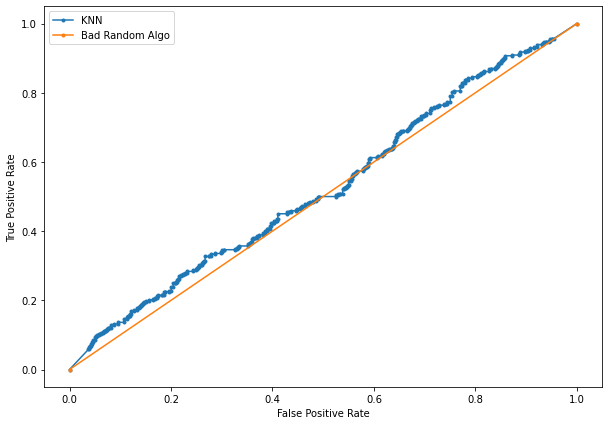

KNN AUC is => 0.5245983551484534


In [46]:
from sklearn.metrics import roc_curve,roc_auc_score

plt.figure(figsize=(10,7))

ns_prob = [0 for _ in range(len(y_test))]  # bad algo
ns_fpr,ns_tpr,thresholds = roc_curve(y_test,ns_prob)

knn_prob = y_pred_proba_knn[:,1]
knn_auc = roc_auc_score(y_test,knn_prob)   # logistic regression
knn_fpr,knn_tpr,thesholds = roc_curve(y_test,knn_prob)
plt.plot(knn_fpr,knn_tpr,marker='.',label='KNN')
plt.plot(ns_fpr,ns_tpr,marker='.',label='Bad Random Algo')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print(f'KNN AUC is => {knn_auc}')

### `Decision Tree`

In [47]:
parameters = {
   'criterion':['gini', 'entropy'],
    'splitter':['best', 'random'],
    'max_features':[int, float,'auto', 'sqrt', 'log2']
    
}

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeClassifier()
dtree_grid = GridSearchCV(dtree,parameters,n_jobs=-1,scoring="accuracy",cv=10)
dtree_grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': [<class 'int'>, <class 'float'>,
                                          'auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [49]:
dtree_grid.best_params_

{'criterion': 'gini', 'max_features': 'log2', 'splitter': 'best'}

In [50]:
dtree = DecisionTreeClassifier(criterion='gini',max_features='sqrt',splitter='best')
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,recall_score
print('Accuracy =>',accuracy_score(y_test,y_pred))
print('Precision =>',precision_score(y_test,y_pred))
print('F-1 score =>',f1_score(y_test,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_test,y_pred))
print('Recall score',recall_score(y_test,y_pred))

Accuracy => 0.5149330587023687
Precision => 0.490280777537797
F-1 score => 0.49081081081081085
Confusion matrix =>
 [[273 236]
 [235 227]]
Recall score 0.49134199134199136


### `AUC`

In [52]:
y_pred_proba_dtree = dtree.predict_proba(X_test)
y_pred_proba_dtree

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

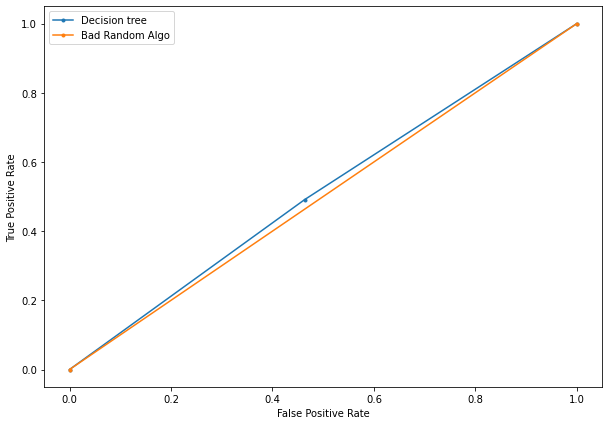

Decision Tree AUC is => 0.5138438836867127


In [53]:
from sklearn.metrics import roc_curve,roc_auc_score

plt.figure(figsize=(10,7))

ns_prob = [0 for _ in range(len(y_test))]  # bad algo
ns_fpr,ns_tpr,thresholds = roc_curve(y_test,ns_prob)

dtree_prob = y_pred_proba_dtree[:,1]
dtree_auc = roc_auc_score(y_test,dtree_prob)   # logistic regression
dtree_fpr,dtree_tpr,thesholds = roc_curve(y_test,dtree_prob)
plt.plot(dtree_fpr,dtree_tpr,marker='.',label='Decision tree')
plt.plot(ns_fpr,ns_tpr,marker='.',label='Bad Random Algo')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print(f'Decision Tree AUC is => {dtree_auc}')

### `Random Forest`

In [54]:
parameters = {
   'n_estimators':[10,100],
    'criterion':['gini', 'entropy'],
    'max_features':[int, float,'auto', 'sqrt', 'log2'],
    'bootstrap':[True,False],
    'ccp_alpha':[0.0,0.1]   
}

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rftree = RandomForestClassifier()
rftree_grid = GridSearchCV(rftree,parameters,n_jobs=-1,scoring="accuracy",cv=10)
rftree_grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'ccp_alpha': [0.0, 0.1],
                         'criterion': ['gini', 'entropy'],
                         'max_features': [<class 'int'>, <class 'float'>,
                                          'auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 100]},
             scoring='accuracy')

In [56]:
rftree_grid.best_params_

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'entropy',
 'max_features': 'log2',
 'n_estimators': 100}

In [57]:
rftree = RandomForestClassifier(bootstrap= True,
 ccp_alpha= 0.0,
 criterion= 'gini',
 max_features= 'sqrt',
 n_estimators= 100)
rftree.fit(X_train,y_train)
y_pred = rftree.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,recall_score
print('Accuracy =>',accuracy_score(y_test,y_pred))
print('Precision =>',precision_score(y_test,y_pred))
print('F-1 score =>',f1_score(y_test,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_test,y_pred))
print('Recall score',recall_score(y_test,y_pred))

Accuracy => 0.5128733264675592
Precision => 0.48893360160965793
F-1 score => 0.5067778936392076
Confusion matrix =>
 [[255 254]
 [219 243]]
Recall score 0.525974025974026


### `AUC`

In [59]:
y_pred_proba_rfc = rftree.predict_proba(X_test)
y_pred_proba_rfc

array([[0.41, 0.59],
       [0.9 , 0.1 ],
       [0.48, 0.52],
       ...,
       [0.51, 0.49],
       [0.24, 0.76],
       [0.59, 0.41]])

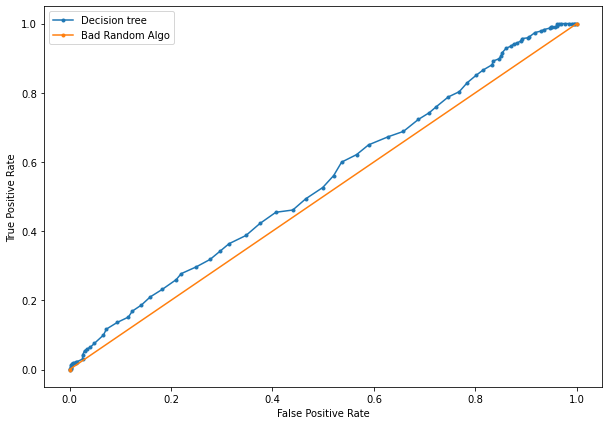

Decision Tree AUC is => 0.5420695872562277


In [60]:
from sklearn.metrics import roc_curve,roc_auc_score

plt.figure(figsize=(10,7))

ns_prob = [0 for _ in range(len(y_test))]  # bad algo
ns_fpr,ns_tpr,thresholds = roc_curve(y_test,ns_prob)

rfc_prob = y_pred_proba_rfc[:,1]
rfc_auc = roc_auc_score(y_test,rfc_prob)   # logistic regression
rfc_fpr,rfc_tpr,thesholds = roc_curve(y_test,rfc_prob)
plt.plot(rfc_fpr,rfc_tpr,marker='.',label='Decision tree')
plt.plot(ns_fpr,ns_tpr,marker='.',label='Bad Random Algo')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print(f'Decision Tree AUC is => {rfc_auc}')

## `Gradient Boosting --------------------------------------`

In [75]:
parameters = {
    'learning_rate':[0.1],
    'n_estimators':[10,100],
    'criterion':['friedman_mse', 'squared_error', 'mse', 'mae']
}

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

gbc = GradientBoostingClassifier()
gbc_grid = GridSearchCV(gbc,parameters,n_jobs=-1,scoring="accuracy",cv=10)
gbc_grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse',
                                       'mae'],
                         'learning_rate': [0.1], 'n_estimators': [10, 100]},
             scoring='accuracy')

In [77]:
gbc_grid.best_params_

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'n_estimators': 100}

In [78]:
gbc = GradientBoostingClassifier(criterion= 'friedman_mse', learning_rate= 0.1, n_estimators= 10)
gbc.fit(X_train,y_train)
y_pred = gbc.predict(X_test)

In [79]:
print('Accuracy =>',accuracy_score(y_test,y_pred))
print('Precision =>',precision_score(y_test,y_pred))
print('F-1 score =>',f1_score(y_test,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_test,y_pred))
print('Recall score',recall_score(y_test,y_pred))

Accuracy => 0.5283213182286303
Precision => 0.5026109660574413
F-1 score => 0.6270358306188926
Confusion matrix =>
 [[128 381]
 [ 77 385]]
Recall score 0.8333333333333334


In [80]:
y_pred_proba_gbc = gbc.predict_proba(X_test)
y_pred_proba_gbc

array([[0.48208386, 0.51791614],
       [0.81080703, 0.18919297],
       [0.44010365, 0.55989635],
       ...,
       [0.55825461, 0.44174539],
       [0.44010365, 0.55989635],
       [0.429881  , 0.570119  ]])

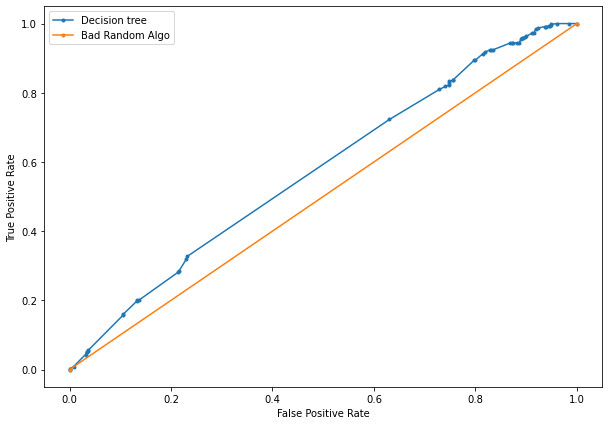

Decision Tree AUC is => 0.5752281444815825


In [81]:
from sklearn.metrics import roc_curve,roc_auc_score

plt.figure(figsize=(10,7))

ns_prob = [0 for _ in range(len(y_test))]  # bad algo
ns_fpr,ns_tpr,thresholds = roc_curve(y_test,ns_prob)

gbc_prob = y_pred_proba_gbc[:,1]
gbc_auc = roc_auc_score(y_test,gbc_prob)   # logistic regression
gbc_fpr,gbc_tpr,thesholds = roc_curve(y_test,gbc_prob)
plt.plot(gbc_fpr,gbc_tpr,marker='.',label='Decision tree')
plt.plot(ns_fpr,ns_tpr,marker='.',label='Bad Random Algo')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print(f'Decision Tree AUC is => {gbc_auc}')

## `Ada Boost ---------------------------------------------------`

In [82]:
parameters = {
    'n_estimators':[10,50],
    'learning_rate':[0.1,0.2]
}

In [83]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

abc = AdaBoostClassifier()
abc_grid = GridSearchCV(abc,parameters,n_jobs=-1,scoring="accuracy",cv=10)
abc_grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2], 'n_estimators': [10, 50]},
             scoring='accuracy')

In [84]:
abc_grid.best_params_

{'learning_rate': 0.2, 'n_estimators': 50}

In [85]:
abc = AdaBoostClassifier(learning_rate= 0.1, n_estimators= 50)
abc.fit(X_train,y_train)
y_pred = abc.predict(X_test)

In [86]:
print('Accuracy =>',accuracy_score(y_test,y_pred))
print('Precision =>',precision_score(y_test,y_pred))
print('F-1 score =>',f1_score(y_test,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_test,y_pred))
print('Recall score',recall_score(y_test,y_pred))

Accuracy => 0.5221421215242018
Precision => 0.49865229110512127
F-1 score => 0.6146179401993355
Confusion matrix =>
 [[137 372]
 [ 92 370]]
Recall score 0.8008658008658008


In [87]:
y_pred_proba_abc = abc.predict_proba(X_test)
y_pred_proba_abc

array([[0.49417039, 0.50582961],
       [0.64963827, 0.35036173],
       [0.48207281, 0.51792719],
       ...,
       [0.52223087, 0.47776913],
       [0.48285752, 0.51714248],
       [0.48207281, 0.51792719]])

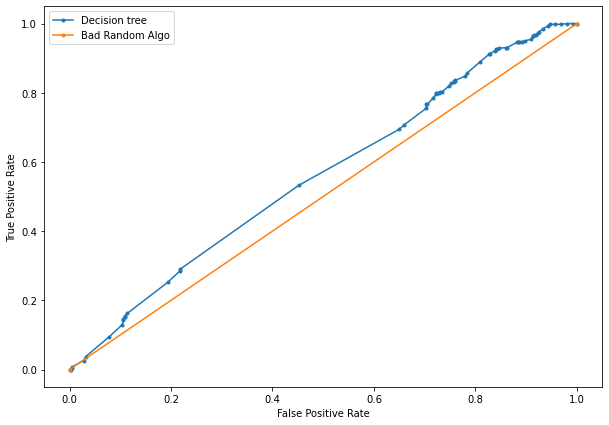

Decision Tree AUC is => 0.558058837037226


In [88]:
from sklearn.metrics import roc_curve,roc_auc_score

plt.figure(figsize=(10,7))

ns_prob = [0 for _ in range(len(y_test))]  # bad algo
ns_fpr,ns_tpr,thresholds = roc_curve(y_test,ns_prob)

abc_prob = y_pred_proba_abc[:,1]
abc_auc = roc_auc_score(y_test,abc_prob)   # logistic regression
abc_fpr,abc_tpr,thesholds = roc_curve(y_test,abc_prob)
plt.plot(abc_fpr,abc_tpr,marker='.',label='Decision tree')
plt.plot(ns_fpr,ns_tpr,marker='.',label='Bad Random Algo')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print(f'Decision Tree AUC is => {abc_auc}')

### `Random Forest is working Best after hyper parmeter tuning`

## `End of task4 ----------------------------------------`